In [35]:
import cv2
import warnings
import mediapipe as mp
import os
import absl.logging
import matplotlib.pyplot as plt
import pandas as pd

# Suppress TensorFlow, MediaPipe, and protobuf logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   # 0 = all logs, 1 = info, 2 = warning, 3 = error only
absl.logging.set_verbosity(absl.logging.ERROR)
warnings.filterwarnings("ignore")

In [45]:

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
# For webcam input:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)
    print(results)
    break

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_pose_landmarks_style())

    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()

I0000 00:00:1762626741.099944   24209 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1762626741.102113   25843 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: AMD Radeon Graphics (radeonsi, renoir, ACO, DRM 3.61, 6.14.0-35-generic)
W0000 00:00:1762626741.187899   25833 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762626741.205048   25837 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762626741.206115   25837 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762626741.206155   25838 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. D

<class 'mediapipe.python.solution_base.SolutionOutputs'>


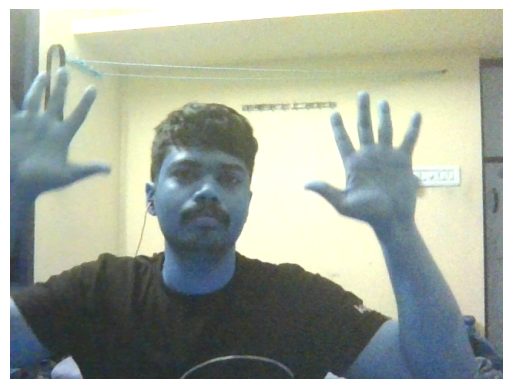

In [46]:
#image = cv2.imread(image)
image = cv2.convertScaleAbs(image, alpha=1.2, beta=25)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [47]:
results.face_landmarks

landmark {
  x: 0.397722065
  y: 0.553010583
  z: -0.0303019099
}
landmark {
  x: 0.40226841
  y: 0.508935809
  z: -0.0452920683
}
landmark {
  x: 0.399563968
  y: 0.525182366
  z: -0.0267590396
}
landmark {
  x: 0.396056831
  y: 0.474206924
  z: -0.0302164648
}
landmark {
  x: 0.403218806
  y: 0.497102737
  z: -0.0467747636
}
landmark {
  x: 0.403544039
  y: 0.48350516
  z: -0.04163507
}
landmark {
  x: 0.403374285
  y: 0.452645779
  z: -0.013789719
}
landmark {
  x: 0.339140713
  y: 0.451990187
  z: 0.0132653546
}
landmark {
  x: 0.404453576
  y: 0.428995967
  z: -0.00431979541
}
landmark {
  x: 0.405679613
  y: 0.413654923
  z: -0.00352727855
}
landmark {
  x: 0.40827632
  y: 0.361397922
  z: 0.0144453989
}
landmark {
  x: 0.397311836
  y: 0.558759153
  z: -0.029603608
}
landmark {
  x: 0.396584809
  y: 0.563261092
  z: -0.0272359736
}
landmark {
  x: 0.395918816
  y: 0.565300882
  z: -0.0238690525
}
landmark {
  x: 0.395314097
  y: 0.566511273
  z: -0.024755612
}
landmark {
  x: 0.

In [48]:
results.left_hand_landmarks

landmark {
  x: 0.78166
  y: 0.566998124
  z: 3.05157101e-07
}
landmark {
  x: 0.725402832
  y: 0.556916416
  z: -0.0183647349
}
landmark {
  x: 0.676201284
  y: 0.5224002
  z: -0.0275718346
}
landmark {
  x: 0.640839517
  y: 0.490361422
  z: -0.0360639505
}
landmark {
  x: 0.609147787
  y: 0.478221834
  z: -0.0440161675
}
landmark {
  x: 0.697890759
  y: 0.412029177
  z: -0.00799221732
}
landmark {
  x: 0.675828338
  y: 0.352210075
  z: -0.0171441548
}
landmark {
  x: 0.667337775
  y: 0.31590575
  z: -0.0267520435
}
landmark {
  x: 0.661785126
  y: 0.285534918
  z: -0.0346597135
}
landmark {
  x: 0.730649412
  y: 0.39171508
  z: -0.0104878414
}
landmark {
  x: 0.720287681
  y: 0.318274409
  z: -0.0162623283
}
landmark {
  x: 0.717463851
  y: 0.274585366
  z: -0.0239978936
}
landmark {
  x: 0.716044545
  y: 0.240248024
  z: -0.0306519847
}
landmark {
  x: 0.762766
  y: 0.39024511
  z: -0.0164630208
}
landmark {
  x: 0.760803699
  y: 0.322915852
  z: -0.0269151293
}
landmark {
  x: 0.76

In [49]:
results.right_hand_landmarks

landmark {
  x: 0.0062956661
  y: 0.468586475
  z: 1.14229202e-07
}
landmark {
  x: 0.0640659481
  y: 0.467392683
  z: -0.0160838161
}
landmark {
  x: 0.119164065
  y: 0.448394626
  z: -0.0187953524
}
landmark {
  x: 0.160975829
  y: 0.432970762
  z: -0.0222641658
}
landmark {
  x: 0.192908108
  y: 0.43303746
  z: -0.0259375013
}
landmark {
  x: 0.109143592
  y: 0.335242897
  z: 0.00251825177
}
landmark {
  x: 0.139506519
  y: 0.281901181
  z: -0.00202107383
}
landmark {
  x: 0.153863773
  y: 0.249742538
  z: -0.0111552905
}
landmark {
  x: 0.165566266
  y: 0.220239162
  z: -0.0196344703
}
landmark {
  x: 0.0750614852
  y: 0.305580229
  z: 0.00137642154
}
landmark {
  x: 0.0924783871
  y: 0.238042384
  z: -0.00158894423
}
landmark {
  x: 0.102195024
  y: 0.195430771
  z: -0.0120115876
}
landmark {
  x: 0.108837381
  y: 0.160878077
  z: -0.0217507239
}
landmark {
  x: 0.0404211134
  y: 0.295521
  z: -0.00272496464
}
landmark {
  x: 0.0523936935
  y: 0.231824309
  z: -0.00782739185
}
lan